The Presence of Heart Disease 

Heart disease is a leading cause of death in the world. Risk of heart disease can be influenced by many factors such as blood pressure, cholesterol, age, and sex. 


The question we will try to answer in this project is as follows:

What is the presence of heart disease, when given the age, chest pain type and serum cholesterol of an individual?
 
 
This dataset shows information about several individuals that could contribute to heart disease, like blood pressure, chest pain, age, sex, blood sugar, heart rate, e.t.c, and whether they do or do not have heart disease. The goal of this database is to determine the presence of heart disease in a patient. This goal is represented by the POHD field, which refers to the presence of heart disease in an individual. It is an integer valued from 0 (no presence) to 4. Experiments with this database have focused on distinguishing presence of heart disease (a value from 1 through 4) from absence (0). In this database, sex is represented by integer values, with 0 representing female and 1 representing male. The serum_cholestoral field represents serum cholesterol in mg/dl. The chest_pain_type field is represented by integer values ranging from 1-4. A value of 1 indicates typical angina, 2 is atypical angina, 3 is non-anginal pain, and 4 is asymptomatic. 


In [23]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)

options(repr.matrix.max.rows = 6)

In [24]:

#We have read in and combined all datasets and tidies the data. 
#The NAs in the datasets are replaced with question marks.

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
hungary_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
switzerland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
va_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

cleveland_data <- read_csv(cleveland_url, col_names = FALSE, na = "?")
hungary_data <- read_csv(hungary_url, col_names = FALSE, na = "?")
switzerland_data <- read_csv(switzerland_url, col_names = FALSE, na = "?")
va_data <- read_csv(va_url, col_names = FALSE, na = "?")

heart_disease_data1 <- full_join(cleveland_data, hungary_data) %>%
    full_join(switzerland_data) %>%
    full_join(va_data)

colnames(heart_disease_data1) <- c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD")

head(heart_disease_data1)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
 

Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


The data has now been read into R.

In [25]:
# heart_disease_data <- cleavland_heart_disease_data %>%
#                     select(Age, chest_pain_type, serum_cholestoral, POHD, resting_blood_pressure) %>%
#                     mutate(POHD = as_factor(POHD))
# heart_disease_data

POHD2 <- mutate(heart_disease_data1, Presence_of_Heart_Disease = ifelse(POHD>0, "Positive", "Negative"))

cp2 <- mutate(POHD2, chestpain_type = ifelse(chest_pain_type<4, "Symptomatic", "Asymptomatic"))


heart_data <- cp2 %>%
                    select(Age, chest_pain_type, serum_cholestoral, Presence_of_Heart_Disease, resting_blood_pressure, maximum_heart_rate) 

heart_disease_data1 <- na.omit(heart_data)


heart_disease_data1
heart_data

Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
63,1,233,Negative,145,150
67,4,286,Positive,160,108
67,4,229,Positive,120,129
⋮,⋮,⋮,⋮,⋮,⋮
54,4,333,Positive,127,154
55,4,223,Positive,122,100
62,2,254,Positive,120,93


Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
63,1,233,Negative,145,150
67,4,286,Positive,160,108
67,4,229,Positive,120,129
⋮,⋮,⋮,⋮,⋮,⋮
55,4,223,Positive,122,100
58,4,385,Negative,NA,NA
62,2,254,Positive,120,93


We have selected for desired columns. The data has been cleaned and wrangled into a tidy format.

In [9]:
#seperate into training and testing data
set.seed(1234)

heart_disease_split <- initial_split(heart_disease_data, prop = 0.70, strata = Presence_of_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train
heart_disease_test

Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
63,1,233,Negative,145,150
67,4,286,Positive,160,108
67,4,229,Positive,120,129
⋮,⋮,⋮,⋮,⋮,⋮
46,4,310,Positive,134,126
54,4,333,Positive,127,154
55,4,223,Positive,122,100


Age,chest_pain_type,serum_cholestoral,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
56,2,236,Negative,120,178
63,4,254,Positive,130,147
56,3,256,Positive,130,142
⋮,⋮,⋮,⋮,⋮,⋮
68,3,254,Negative,134,151
53,4,300,Positive,144,128
62,2,254,Positive,120,93


The data has been seperated into training and testing data.

In [14]:
#useful Tables 


summerized_POHD <- heart_disease_train %>%
    group_by(Presence_of_Heart_Disease) %>%
    summarize("Number of variable"= n())

summerized_cp <- heart_disease_train %>%
    group_by(chest_pain_type) %>%
    summarize("Number of variable"= n())
summerized_cp

mean_variables <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestoral),
                           "Mean Chest Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure), 
                           "Mean maximum heart rate" = mean(maximum_heart_rate)) 
summerized_POHD
mean_variables


# mutate(heart_disease_train, Positive.Negative = ifelse(POHD>0, "Positive", "Negative"))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain_type,Number of variable
<dbl>,<int>
1,33
2,109
3,115
4,328


Presence_of_Heart_Disease,Number of variable
<chr>,<int>
Negative,262
Positive,323


Mean Age,Mean serum cholestoral,Mean Chest Pain Type,Mean Resting Blood Pressure,Mean maximum heart rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.78291,197.2325,3.261538,131.3744,137.9812


We have created two tables. The first shows the number of rows that correspond positive and negative POHD values. The second shows the mean values of our selected values. 

In [11]:
#scaled Data 
heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestoral + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 


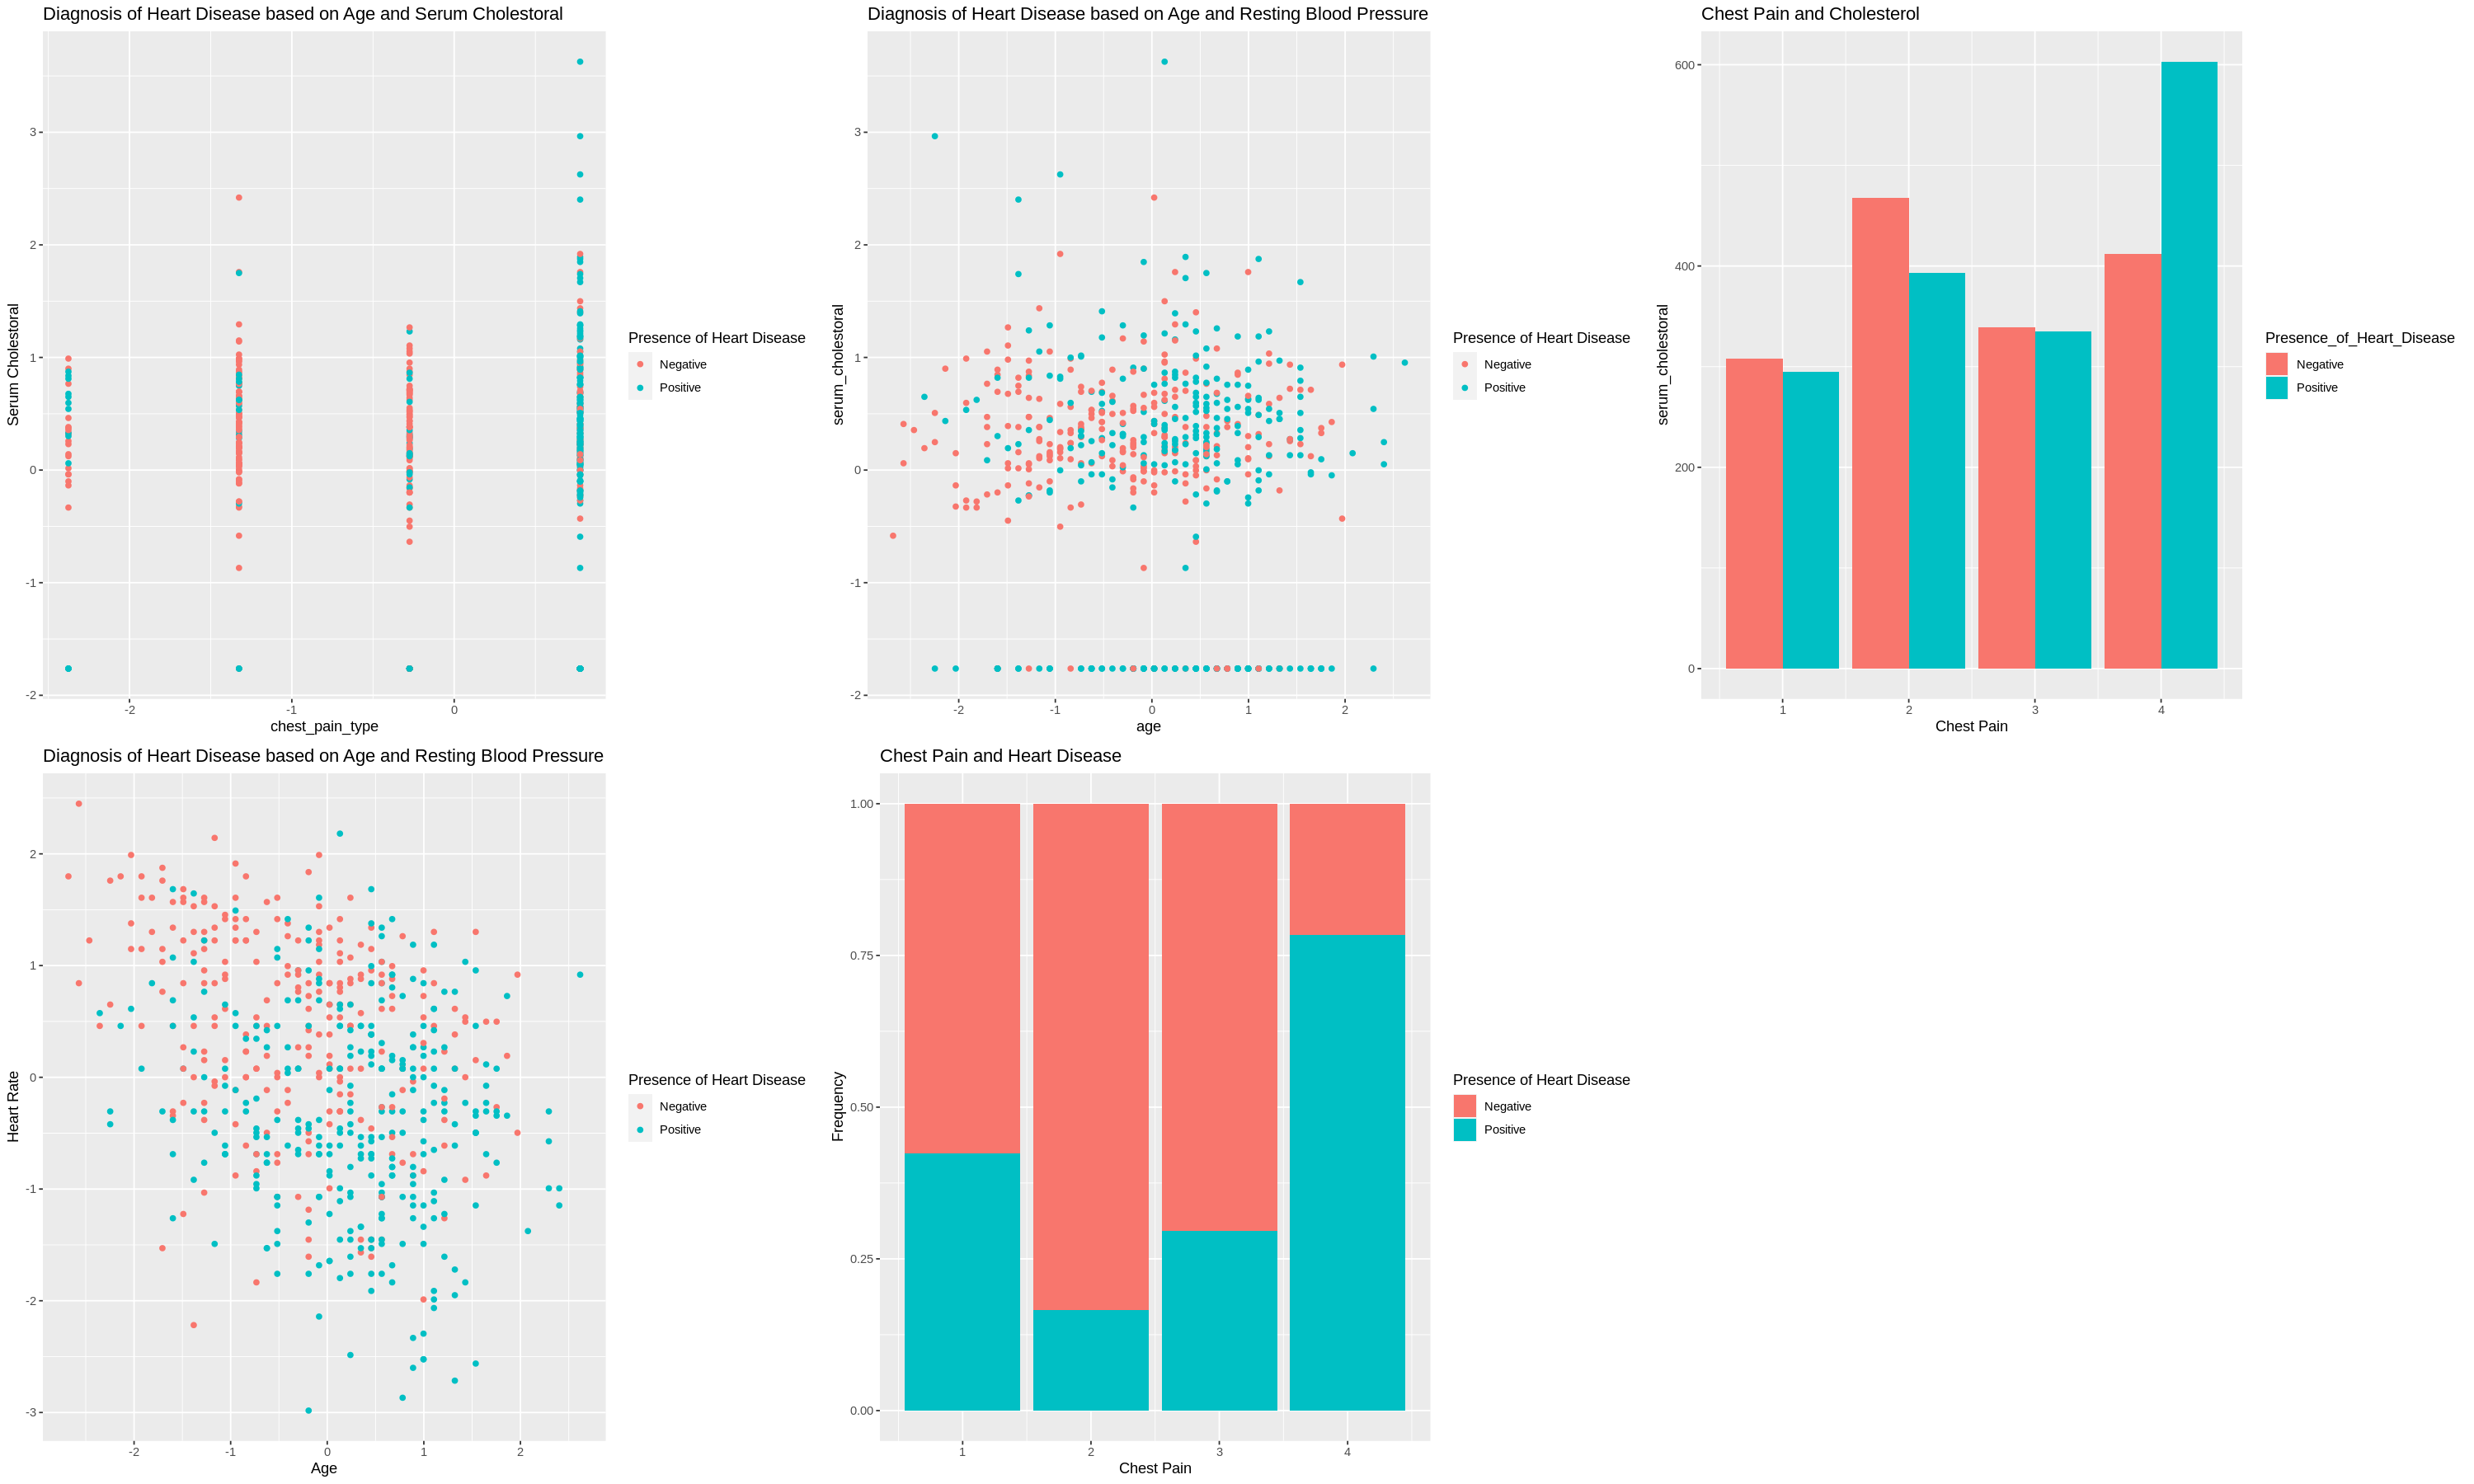

In [12]:
options(repr.plot.width = 25, repr.plot.height = 15)
plot_1 <- heart_disease_scaled %>%
    ggplot (aes(x=chest_pain_type, y=serum_cholestoral, color= Presence_of_Heart_Disease)) +
    geom_point() +
    labs(x= "chest_pain_type", y= "Serum Cholestoral", color = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Serum Cholestoral" )


plot_2 <- heart_disease_scaled %>%
    ggplot (aes(x=Age, y=serum_cholestoral, colour= Presence_of_Heart_Disease)) +
    geom_point() +
    labs(x= "age", y= "serum_cholestoral", colour = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure" )

plot_3 <- ggplot(heart_disease_train, aes(x = chest_pain_type, y = serum_cholestoral, fill = Presence_of_Heart_Disease)) + 
   geom_bar(stat = "identity", position = "dodge") + 
  xlab("Chest Pain") +
  ylab("serum_cholestoral") +
  labs(fill = "Presence_of_Heart_Disease") +
  ggtitle("Chest Pain and Cholesterol" )


plot_4 <- heart_disease_scaled %>%
    ggplot (aes(x= Age, y= maximum_heart_rate, color = Presence_of_Heart_Disease)) +
    geom_point() +
    labs(x= "Age", y= "Heart Rate", color = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure" )


plot_5 <- heart_disease_train %>%
   ggplot(aes(x = chest_pain_type, fill = Presence_of_Heart_Disease)) + 
   geom_bar(position = 'fill') + 
   xlab("Chest Pain") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Chest Pain and Heart Disease") 

plot_grid(plot_1, plot_2, plot_3, plot_4, plot_5)

The plots above show relationships between our predictors. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age, chest pain, and heart rate are good predictors.